In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from collections import defaultdict
from scipy import stats

In [2]:
transactions = pd.read_csv("./data/dh_transactions.csv")
products = pd.read_csv("./data/dh_product_lookup.csv")

In [106]:
data = transactions.join(products.set_index('upc'),on = "upc")

In [87]:
baskets = data.groupby(['basket'])

# Most popular Commodity, Brand and Product

In [8]:
commodities = data["commodity"].value_counts()

Text(0.5, 1.0, '2.1 Distribution of Commodity Sold')

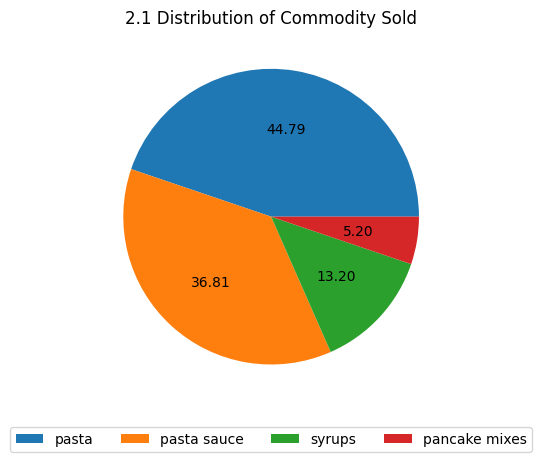

In [10]:
plt.pie(commodities.values,labels = commodities.index, labeldistance = None, autopct='%.2f')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, ncol=5)
plt.title("2.1 Distribution of Commodity Sold")

In [49]:
brands = data["brand"].value_counts()

In [38]:
top_10_brands = brands.values
top_10_brands[10] = np.sum(top_10_brands[10:])
top_10_brands = top_10_brands[:11]

In [39]:
top_10s = []
for brand in brands.index:
    if len(top_10s) < 10:
        top_10s.append(brand)

In [40]:
top_10s = top_10s + ["others"]

In [41]:
colors = ['red', 'blue', 'yellow', 'green', 'orange', 'purple', 'brown', 'pink', 'navy', 'gray', 'magenta','lime']

Text(0.5, 1.0, '2.2 Distribution of Brand Sold (top 10)')

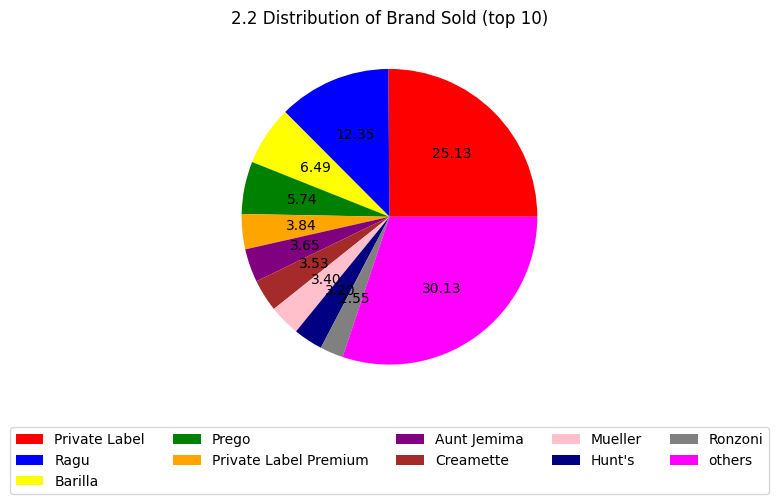

In [56]:
# This one needs it own color set because default colorset doesn't have enough color in the list so some labels
# are shown with the same color.
plt.pie(top_10_brands,labels = top_10s, labeldistance = None, autopct='%.2f',colors=colors)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, ncol=5)
plt.title("2.2 Distribution of Brand Sold (top 10)")

In [48]:
product_names = data["product_description"].value_counts()

In [67]:
def what_sold(brand_name):
    brand = data[data["brand"] == brand_name]
    print(brand["commodity"].value_counts())

In [68]:
what_sold("Private Label")

pasta            998961
pasta sauce      245385
syrups           206115
pancake mixes     52095
Name: commodity, dtype: int64


In [70]:
what_sold("Ragu")

pasta sauce    738294
Name: commodity, dtype: int64


In [71]:
what_sold("Barilla")

pasta          322649
pasta sauce     65486
Name: commodity, dtype: int64


In [72]:
what_sold("Prego")

pasta sauce    342971
Name: commodity, dtype: int64


In [73]:
what_sold("Private Label Premium")

pasta            172590
pasta sauce       28055
syrups            25032
pancake mixes      4009
Name: commodity, dtype: int64


In [85]:
np.sum(brands<104),np.sum(brands<24),len(brands)

(57, 39, 131)

In [86]:
np.sum(product_names<104),np.sum(product_names<24),len(product_names)

(289, 189, 872)

## Conclusion

1. Our most popular commodity is pasta(44.79%) followed by pasta sauce(36.81%), syrups(13.20%) and pancake mixes(5.20%)
2. Our top 5 most popular brand are<br>
    -Private Label(25.13%) -sells all 4 commodities<br>
    -Ragu(12.35%) -sells only pasta sauce<br>
    -Barilla(6.49%) -sells only pasta and pasta sauce<br>
    -Prego(5.74%) -sells only pasta sauce<br>
    -Private Label Premium(3.84%) -sells all 4 commodities<br>
3. Some products/brands don't sold well at all<br>
    -32.19% of products sell less than once a week<br>
    -42.75% of brands sell less than once a week<br>
    -21.67% of products sell less than once a month<br>
    -29.77% of brands sell less than once a month<br>

# Imaginary Situation If we remove unpopular brands/products

Since we know many product don't perform that well, we can simulate how many customers/sales we lost from removing that product.

In [128]:
def remove_product_and_brands(brand_cut_off,product_cut_off,main_data = data.copy()):
    
    total_sales_before = main_data["dollar_sales"].sum()
    baskets_before = main_data.groupby(['basket'])
    num_customers_before = len(baskets_before.size())
    
    brands = data["brand"].value_counts()
    products = data["product_description"].value_counts()
    
    cut_brands = brands[brands <= brand_cut_off].index
    cut_products = products[products <= product_cut_off].index
    
    new_data = main_data[~main_data["brand"].isin(cut_brands)]
    new_data = new_data[~new_data["product_description"].isin(cut_products)]
    
    total_sales_after = new_data["dollar_sales"].sum()
    baskets_after = new_data.groupby(['basket'])
    num_customers_after = len(baskets_after.size())
    
    return ((total_sales_before-total_sales_after)/total_sales_before,
            (num_customers_before-num_customers_after)/num_customers_before)   

In [132]:
remove_product_and_brands(1000,1000)

(0.018104356040355835, 0.00845447810227452)

There is an interactive version where you can altering both parameters(brand_cut_off, product_cut_off) avaliable. (requires streamlit as additional library) <br>
To active the interactive version, go to this directory via commandline and run a command "streamlit run simulation_removing.py". After activing the file, you will see 2 input fields, just input some numbers in there and click submit.<br>

With this, we know which brands/products we can rotate out from our store to open a place for new brands/products that might sell better or reduce storage cost.

# Most Popular Brand in Each Commodity

In [147]:
pasta_brand_performance = data[data["commodity"] == "pasta"]["brand"].value_counts()

In [148]:
sauce_brand_performance = data[data["commodity"] == "pasta sauce"]["brand"].value_counts()

In [149]:
pancake_brand_performance = data[data["commodity"] == "pancake mixes"]["brand"].value_counts()

In [150]:
syrup_brand_performance = data[data["commodity"] == "syrups"]["brand"].value_counts()

In [151]:
pasta_brand_performance

Private Label            998961
Barilla                  322649
Creamette                211008
Mueller                  203244
Private Label Premium    172590
Ronzoni                  152712
San Giorgio               84884
No Yolks                  47218
Hodgson Mills             39425
Private Label Value       30898
Healthy Harvest           14973
Dreamfield                13371
Barilla Plus              10064
DaVinci                    7448
Dececco                    6280
Pennsylvania Dutch         2910
Kraft                      2328
Al Dente                   1386
R&F                        1024
Mrs Weiss                   697
Colavita                    656
Defino                      537
Maggi Spaetzle              525
Alessi                      393
Notta                       372
Eddie                       340
Pasta Shoppe                216
Mother's                    157
La Moderna                  116
Sugar Buster                100
Orzo                         90
Wacky Ma

In [152]:
sauce_brand_performance

Ragu                     738294
Prego                    342971
Private Label            245385
Hunt's                   191583
Classico                 148032
Bertolli                  84905
Barilla                   65486
Newman's                  42762
Private Label Premium     28055
Emeril's                  17487
Chef Pizza                 3437
Candoni                    1294
Patsy's                     637
Buitoni                     616
Boves                       468
Colavita                    425
Mom's                       294
Roselli                     233
Raos                        213
Dell Amore                  206
Sinatra's                   159
Alessi                      127
Brother's                    88
Cento                        73
San Marzano                  70
Elena's                      54
Bellino                      42
Vincent's                    28
Silver Palate                20
Dave's                       17
Annarino                     16
Amore   

In [153]:
pancake_brand_performance

Aunt Jemima              97264
Hungry Jack              54633
Private Label            52095
Krusteaz                 13910
White Lily               13772
Bisquick                 12674
Hodgson Mills             6131
Mrs Butterworth           5999
Private Label Premium     4009
Pioneer                   3213
Maple Grove               3018
M W Flapstax              1827
Bruce's                    939
Classique                  698
Osem Bissli                 85
Fastshake                   27
Lund Swede                   3
Name: brand, dtype: int64

In [154]:
syrup_brand_performance

Private Label            206115
Aunt Jemima              120901
Mrs Butterworth           51197
Northwoods                49519
Karo                      47488
Log Cabin                 41172
Hungry Jack               34556
Private Label Premium     25032
Kellogg                   18652
Cozy Cottage              17115
Cary's                    13685
Pennant                   11281
Smuckers                   9662
Spring Tree                9175
Private Label Value        9122
Grandma Molases            6327
Alaga                      3331
Maple Grove                3260
Brier Rabbit               2449
Michele's                  1877
Sobrab Bkstrp              1679
Miller                     1080
Moonlite                    601
HSE                         368
Fifty 50                     94
Pine Mountain                76
Golden Eagle                 72
Howard's                     11
Sand Mountain                 6
Tree of Life                  5
Knott's                       3
Lyles   

# Basket Analysis

In [5]:
item_counts = baskets["units"].sum().value_counts().to_numpy()

In [6]:
item_counts[4] = np.sum(item_counts[4:])
item_counts = item_counts[:5]

Text(0.5, 1.0, '2.3 Amount of items brought per basket')

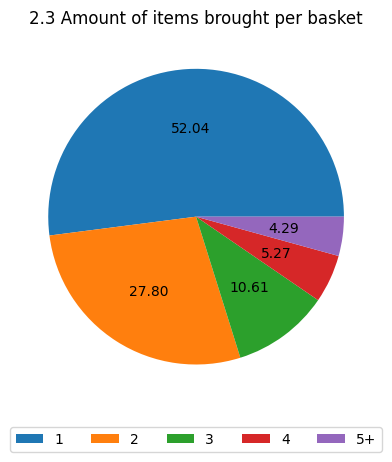

In [146]:
plt.pie(item_counts, labels = ["1","2","3","4","5+"],labeldistance = None, autopct='%.2f')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, ncol=5)
plt.title("2.3 Amount of items brought per basket")

In [134]:
value_per_baskets = baskets['dollar_sales'].sum().to_numpy()
#remove outlier
value_per_baskets = value_per_baskets[value_per_baskets<=100]

In [140]:
a = []
bins = np.arange(0,101,10)
for idx in range(1,len(bins)):
    a.append(((bins[idx-1] < value_per_baskets) & (value_per_baskets < bins[idx])).sum())  

Text(0.5, 1.0, '2.4 Total Value of items in each basket (All)')

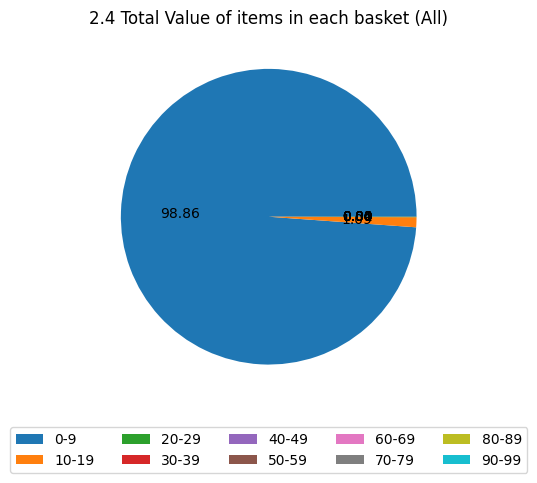

In [141]:
plt.pie(a, labels = ["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90-99"],labeldistance = None, autopct='%.2f')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, ncol=5)
plt.title("2.4 Total Value of items in each basket (All)")

In [142]:
b = []
bins = np.arange(0,10,1)
for idx in range(1,len(bins)):
    b.append(((bins[idx-1] < value_per_baskets) & (value_per_baskets < bins[idx])).sum())  

Text(0.5, 1.0, '2.5 Total value of items in each basket (0-9 dollars)')

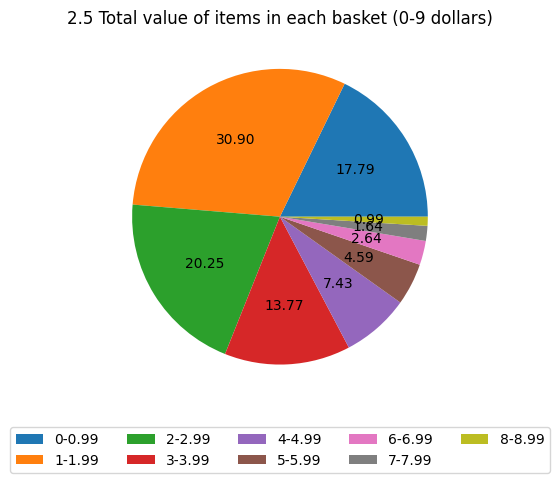

In [145]:
plt.pie(b, labels = ["0-0.99","1-1.99","2-2.99","3-3.99","4-4.99","5-5.99","6-6.99","7-7.99","8-8.99"], labeldistance = None, autopct='%.2f')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, ncol=5)
plt.title("2.5 Total value of items in each basket (0-9 dollars)")

## Conclusion

1. From plot 2.3, more than half(52.04%) of our customers buy only 1 item per basket.
2. Most customers buy around 0-3 dollars worth of products each time they comes to our store.